# Aquaplanet Ozone dataset revision

Email form Yoko Tsushima informed me that the high-top ozone dataset (DOI: 10.5065/D64X5653) was not zonally symmetric.

Here I simply confirm that is true. Then we take the zonal average and save an updated dataset.

The original file was made with an NCL script. The zonal asymmetry was present because I forgot to replace the OZONE array with its zonal average. This notebook just does that final step.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [2]:
# ORIGINAL DATA
F = xr.open_dataset('/Users/brianpm/Tub/aquaplanet_ozone_hightop_c160920.nc')

In [3]:
F

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 69, lon: 144, time: 12)
Coordinates:
  * time     (time) float64 4.382e+04 4.384e+04 4.388e+04 4.390e+04 ...
  * lev      (lev) float32 5e-06 1e-05 1.5e-05 2.5e-05 4.5e-05 7e-05 1e-04 ...
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 -78.63 ...
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    OZONE    (time, lev, lat, lon) float64 ...
    P0       float64 ...
    date     (time) int32 ...
    datesec  (time) int32 ...
Attributes:
    title:        Aquaplanet ozone data set
    institution:  NCAR
    source:       Brian Medeiros <brianpm@ucar.edu>
    comment:      Blended data based on APE ozone (from AMIP II) and WACCM cl...
    history:      Thu Sep 22 13:17:56 2016: ncatted -O -a units,OZONE,m,c,FRA...
    NCO:          "4.5.5"

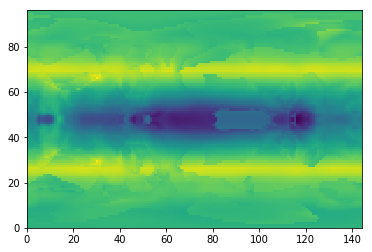

In [7]:
# JUST PLOT A MAP TO SEE THE ZONAL ASYMMETRY
plt.pcolormesh(F['OZONE'].isel(time=1).sel(lev=1000, method='nearest'))

In [8]:
# APPLY ZONAL AVERAGE
ozone_zonal_average = F['OZONE'].mean(dim='lon')

In [9]:
ozone_zonal_average

<xarray.DataArray 'OZONE' (time: 12, lev: 69, lat: 96)>
array([[[5.327674e-13, 5.154311e-13, ..., 5.154311e-13, 5.327674e-13],
        [1.624036e-11, 1.638772e-11, ..., 1.638772e-11, 1.624036e-11],
        ...,
        [2.391247e-08, 2.390994e-08, ..., 2.337224e-08, 2.337057e-08],
        [2.260400e-08, 2.262803e-08, ..., 2.377535e-08, 2.347257e-08]],

       [[5.327674e-13, 5.154311e-13, ..., 5.154311e-13, 5.327674e-13],
        [1.624036e-11, 1.638772e-11, ..., 1.638772e-11, 1.624036e-11],
        ...,
        [2.391247e-08, 2.390994e-08, ..., 2.337224e-08, 2.337057e-08],
        [2.260400e-08, 2.262803e-08, ..., 2.377535e-08, 2.347257e-08]],

       ...,

       [[5.327674e-13, 5.154311e-13, ..., 5.154311e-13, 5.327674e-13],
        [1.624036e-11, 1.638772e-11, ..., 1.638772e-11, 1.624036e-11],
        ...,
        [2.391247e-08, 2.390994e-08, ..., 2.337224e-08, 2.337057e-08],
        [2.260400e-08, 2.262803e-08, ..., 2.377535e-08, 2.347257e-08]],

       [[5.327674e-13, 5.154311e-1

In [10]:
# BROADCAST ZONAL AVERAGE TO FULL ARRAY SIZE
ozone1, ozone_za = xr.broadcast(F['OZONE'], ozone_zonal_average)

In [39]:
# CONFIRM THAT ARBITRARY LONGITUDES ARE EQUAL
(ozone_za[:,:,:,1] == ozone_za[:,:,:,99]).all().values

array(True)

In [14]:
# A NEW OBJECT THAT IS THE SAME AS OUR INPUT DATA
# NOTE: This is an unnecessary step, as this just makes a new reference to F.
out_ds = F

In [15]:
# INSERT ZONAL AVERAGE OZONE
out_ds['OZONE'] = ozone_za

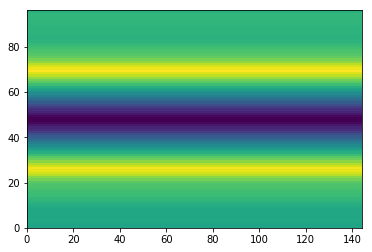

In [33]:
# CONFIRM ZONAL SYMMETRY IN OUTPUT DATASET
plt.pcolormesh(out_ds['OZONE'].isel(time=1).sel(lev=1000, method='nearest'))

In [25]:
# APPEND A STATEMENT TO THE HISTORY ATTRIBUTE
out_ds.attrs['history'] += f"{str(datetime.date.today())}: Replaced OZONE with zonal_average[OZONE], as originally intended."

In [27]:
out_ds.attrs['history']

'Thu Sep 22 13:17:56 2016: ncatted -O -a units,OZONE,m,c,FRACTION aquaplanet_ozone_hightop_c160920.nc2018-04-12: Replaced OZONE with zonal_average[OZONE], as originally intended.'

In [34]:
# SAVE THE REVISED DATASET TO A NEW FILE 
out_ds.to_netcdf(f'/Users/brianpm/Tub/aquaplanet_ozone_hightop_c{datetime.date.today().strftime("%Y%m%d")}.nc')

This notebook was written by Brian Medeiros (brianpm@ucar.edu) on 12 April 2018. The revised data set will be published to earthsystemgrid.org pending instructions on how to publish a change. 